# 随机生成训练集X与对应的标签Y

[-10  -1  -7   8  -3  -3  -2   4 -10  -5  -3   2  -7  -6   5   0  -8   7
  -3 -10   3  -6   0   8   5  -1 -10  -9  -4  -2]
[-15, 1, -9, 19, -2, -1, 0, 11, -15, -6, -1, 9, -11, -8, 15, 4, -11, 17, -1, -17, 10, -9, 4, 19, 15, 2, -16, -14, -3, 1]


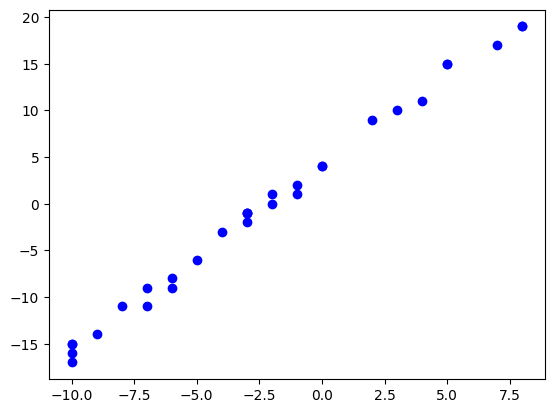

In [34]:
import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
xlim = [-10, 10]

x_train = np.random.randint(low=xlim[0], high=xlim[1], size=30)
y_train = [w*x + b + random.randint(0, 2) for x in x_train]

print(x_train)
print(y_train)

plt.plot(x_train, y_train, 'bo')


# 一、构建线性回归模型

y = wx + b

In [35]:
import torch
from torch import nn

# 1. 继承 nn.Module 类


class LinearModel(nn.Module):
    # 2. 重写 __init__() 方法
    #    将所有要学习的参数的层放到构造函数中
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    # 3. 重写 forward() 方法
    #    如何向前传播
    def forward(self, input):
        return (input * self.weight) + self.bias


model = LinearModel()
x = torch.tensor(3)
y = model(x) # 相当于调用 forward 方法
print(x)
print(y)


tensor(3)
tensor([-5.1211], grad_fn=<AddBackward0>)


# 二、模型训练

In [36]:
model = LinearModel()
optimizer = torch.optim.SGD(
    model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

y_train = torch.tensor(y_train, dtype=torch.float32)
for _ in range(1000):
    # 格式化输入
    input = torch.from_numpy(x_train)
    # 预测结果
    out_put = model(input)
    # 获得预测结果与正在结果的损失函数
    loss = nn.MSELoss()(out_put, y_train)
    # 将梯度清零
    model.zero_grad()
    # 反向梯度传播
    loss.backward()
    # 用计算的梯度去做优化
    optimizer.step()

for parameter in model.named_parameters():
    print(parameter)


('weight', Parameter containing:
tensor([1.9159], requires_grad=True))
('bias', Parameter containing:
tensor([3.3171], requires_grad=True))


# 三、模型的保存与加载

方式一：只保存参数

In [23]:
# 只保存参数
torch.save(model.state_dict(), './data/temp/linear_model.pth')

model.state_dict()


OrderedDict([('weight', tensor([2.0321])), ('bias', tensor([3.8591]))])

In [24]:
# 定义网络结构
linear_model = LinearModel()
# 加载保存的参数
linear_model.load_state_dict(torch.load('./data/temp/linear_model.pth'))
linear_model.eval()

# 输出
for parameter in linear_model.named_parameters():
    print(parameter)


('weight', Parameter containing:
tensor([2.0321], requires_grad=True))
('bias', Parameter containing:
tensor([3.8591], requires_grad=True))


方式二：保存网络结构与参数

In [25]:
# 保存整个模型
torch.save(model, './data/temp/linear_model_with_acr.path')


In [26]:
# 加载模型，不需要创建网络
linear_model_2 = torch.load('./data/temp/linear_model_with_acr.path')
linear_model_2.eval()

# 输出
for parameter in linear_model_2.named_parameters():
    print(parameter)


('weight', Parameter containing:
tensor([2.0321], requires_grad=True))
('bias', Parameter containing:
tensor([3.8591], requires_grad=True))


# 四、参数微调

## 所有参数进行重新训练

AlexNet 网络模型

AleNet 属于图像分类的模型，它们都是在 ImageNet 上训练的。


In [25]:
import torchvision.models as models
# 导入 AleNet 网络模型
alexnet = models.alexnet(pretrained=True)


In [27]:
# 使用图片验证
from PIL import Image
import torchvision
import torchvision.transforms as transforms

im = Image.open('./data/img/dog.jpg')

transform = transforms.Compose([
    transforms.RandomResizedCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.485, 0.485], std=[0.229, 0.224, 0.225])
])
input_tensor = transform(im).unsqueeze(0)
alexnet(input_tensor).argmax()


tensor(254)

In [ ]:
import requests

# ImageNet 的类别标签 URL
url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"

# 发送 HTTP 请求并获取响应
response = requests.get(url)

# 将响应的 JSON 内容转换为 Python 列表
labels = response.json()

# 打印索引为 254 的标签
print(labels[254])


In [28]:
import json

# 打开并读取JSON文件
with open('./data/imagenet-simple-labels.json.txt', 'r') as f:
    labels = json.load(f)
print(labels[254])

pug


CIFAR-10数据集

CIFAR-10数据集共 60000 张图片，10 个类别，每一类包含 6000 图片。
其中 5000 张图片作为训练集，1000 张图片作为测试集。

torch.Size([32, 3, 32, 32])


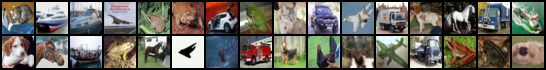

In [29]:
import torchvision
from torch.utils.data import DataLoader

cifar10_dataset = torchvision.datasets.CIFAR10(root='./data',
                                               train=False,
                                               transform=transforms.ToTensor(),
                                               target_transform=None,
                                               download=False)
# 取 32 张图片的 tensor
tensor_dataloader = DataLoader(dataset=cifar10_dataset, batch_size=32)

data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = next(data_iter)
print(img_tensor.shape)

grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=16, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)


In [ ]:
# 打印网络结构
print(alexnet)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [30]:
# 最后全连接层输入是 4096 个单元，输出是 1000 个单元
# 我们将它修改为输出是 10 个单元的全连接层（CIFR10 有 10 类）
import torch
# 提取分类层的输入参数
fc_in_features = alexnet.classifier[6].in_features

# 修改预训练模型的输出分类数
alexnet.classifier[6] = torch.nn.Linear(fc_in_features, 10)
print(alexnet)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# 在 CIFAR-10 上，使用 AlexNet 作为预训练模型训练我们自己的模型
from torch import nn
# 1. 数据读入
transform = transforms.Compose([
    transforms.RandomResizedCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0, 485, 0.406], std=[0.229, 0.224, 0.225])
])

cifar10_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                               train=False,
                                               transform=transform,
                                               target_transform=None,
                                               download=False)

dataloader = DataLoader(dataset=cifar10_dataset,  # 传入的数据集，必须参数
                        batch_size=32,           # 输出的 batch 大小
                        shuffle=True,            # 数据是否打乱
                        num_workers=0)           # 进程数，0 表示只有主进程

# 2. 定义优化器
optimizer = torch.optim.SGD(
    alexnet.parameters(),
    lr=1e-4,
    weight_decay=1e-2,
    momentum=0.9)

# 3. 开始训练
for epoch in range(3):
    for item in dataloader:
        out_put = alexnet(item[0])
        target = item[1]
        # 使用交叉熵损失函数
        loss = nn.CrossEntropyLoss()(out_put, target)
        print('Epoch {}, Loss {}'.format(epoch+1, loss))

        alexnet.zero_grad()
        loss.backward()
        optimizer.step()


## 只训练最后的全连接层

固定整个网络的参数，只训练最后的全连接层

将全连接层之前的参数全部锁死，让他们无法训练

In [ ]:
alexnet = models.alexnet()
alexnet.load_state_dict(torch.load('C:\Users\wangcf\.cache\torch\hub\checkpoints'))
for param in alexnet.parameters():
    param.requires_grad = False


# 五、训练过程可视化



使用 tensorboard

对输出的 runs 目录执行：
tensorboard --logdir=runs

In [14]:
from torch.utils.tensorboard.writer import SummaryWriter

# 创建一个 SummaryWriter 实例
writer = SummaryWriter()

for n_iter in range(1000):
    # 格式化输入
    input = torch.from_numpy(x_train)
    # 预测结果
    out_put = model(input)
    # 获得预测结果与正在结果的损失函数
    loss = nn.MSELoss()(out_put, y_train)
    # 将梯度清零
    model.zero_grad()
    # 反向梯度传播
    loss.backward()
    # 用计算的梯度去做优化
    optimizer.step()
    writer.add_scalar('Loss/train',  # 数据类型的名称，不同名称的数据会使用不同曲线展示
                      loss,  # 要保存的数值
                      n_iter)  # 训练的 step 数


使用 Visdom

启动 Visdom： python -m visdom.server

打开 127.0.0.1:8097

In [ ]:
from visdom import Visdom
import time

# 1. 实例化窗口
viz = Visdom(port=8097)

# 2. 初始化窗口信息
viz.line([0.], [0.], win='train_loss', opts=dict(title='train loss'))

for n_iter in range(1000):
    # 格式化输入
    input = torch.from_numpy(x_train)
    # 预测结果
    out_put = model(input)
    # 获得预测结果与正在结果的损失函数
    loss = nn.MSELoss()(out_put, y_train)
    # 将梯度清零
    model.zero_grad()
    # 反向梯度传播
    loss.backward()
    # 用计算的梯度去做优化
    optimizer.step()
    viz.line([loss.item()], [n_iter], win='train_loss', update='append')